<a href="https://colab.research.google.com/github/iurykischka/Proc.-de-sinais/blob/master/Ex/Ex08_FiltrosDigitais_IURY.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Ex08 - `Iury (0040411)`

Filtros digitais.

**HONESTIDADE ACADÊMICA**

Todo o trabalho feito no sentido do cumprimento das expectativas deste curso deve ser exclusivamente seu. A colaboração de terceiros na realização dos trabalhos não é permitida.

Ver ou copiar o trabalho de outro indivíduo do curso ou retirar material de um livro, site ou outra fonte, mesmo em parte e apresentá-lo como seu próprio constitui desonestidade acadêmica, assim como mostrar ou dar a sua obra, mesmo em parte, a outro estudante. Da mesma forma, é desonestidade acadêmica fornecer ou tornar as soluções disponíveis dos trabalhos para os indivíduos que fazem ou poderão fazer este curso no futuro. Você está convidado a discutir o material do curso com os outros, a fim de melhor compreendê-lo. Você pode até discutir sobre os trabalhos com os colegas, mas você não pode compartilhar códigos, funções, projetos, tabelas, desenhos esquemáticos, mapas ou diagramas.

Você pode e deve recorrer à Web para obter referências na busca de soluções para os trabalhos, mas não por soluções definitivas para os problemas. No entanto, deve-se citar explicitamente no projeto a origem de qualquer procedimento ou técnica que você descubra fora do curso.

Todas as formas de desonestidade acadêmica são tratadas com rigor.


**Instruções:**
- Não apague os comentários que já existem nas células de código. Mas é claro que você pode adicionar outros comentários.
- Não inclua mais células do que o especificado e mantenha a organização.
- Use `plt.figure(figsize=(10,1))` para ajustar o tamanho das figuras e sempre coloque rótulos.

**Objetivos**
- Implementar e analisar filtros FIR digitais
- Implementar e analisar filtros IIR digitais 

## Registre o seu RA

Primeiro, registre o seu RA na variável indicada.


<mark>**Fazer:** Escreva o seu RA na variável `RA`.</mark>

In [81]:
### SEU CÓDIGO COMEÇA AQUI ###
RA = 40411
### FIM DO CÓDIGO ###
print(RA)

40411


**Saída esperada**:
1. Seu número de RA
---

## O problema

Nesta atividade, você vai projetar e implementar filtros digitais FIR e IIR. Os filtros projetados serão usados em sinais de áudio (são os mesmo arquivos usados no Ex02).

<mark> **Faça**</mark>: execute o código abaixo para carregar os áudios.

In [82]:
# Importa bibliotecas
import numpy as np, scipy as sp, matplotlib.pyplot as plt, IPython.display as ipd
from scipy.io import wavfile
from scipy import signal
import requests

# Som do diapasão
response = requests.get('https://github.com/ifmg-betim/2022.2_AUT.040_ProcSin/blob/main/Ex/Ex02_diapasao.wav?raw=true')
open("diapasao.wav", "wb").write(response.content)
fs, diapasao = wavfile.read('diapasao.wav')
diapasao = diapasao[:90000] # sinal do diapasão
diapasao_i = (diapasao-np.mean(diapasao))/np.std(diapasao)

response = requests.get('https://github.com/ifmg-betim/2022.2_AUT.040_ProcSin/blob/main/Ex/Ex02_flauta.wav?raw=true')
open("flauta.wav", "wb").write(response.content)
fs, flauta = wavfile.read('flauta.wav')
flauta = flauta[:90000] # sinal da flauta
flauta_i = (flauta-np.mean(flauta))/np.std(flauta)

response = requests.get('https://github.com/ifmg-betim/2022.2_AUT.040_ProcSin/blob/main/Ex/Ex02_cello.wav?raw=true')
open("cello.wav", "wb").write(response.content)
fs, cello = wavfile.read('cello.wav')
cello = cello[10000:100000,0] # sinal do violoncelo
cello_i = (cello-np.mean(cello))/np.std(cello)

# vetor tempo
tempo = np.arange(len(diapasao))/fs # variável TEMPO (em segundos)
N = len(tempo) #tamanho do sinal
n = np.arange(N) #vetor de amostras
np.random.seed(RA)
r = np.dot(np.random.uniform(.01, .05, 100), np.sin(np.random.uniform(2e3, fs/2,100).reshape((100,1))
                                          *2*np.pi*tempo+np.random.uniform(0, np.pi, (100,1))) )
diapasao = diapasao_i + r
flauta = flauta_i + r
cello = cello_i + r

## Sinais a serem analisado

O código acima criou as variáveis abaixo para serem usadas:
- `tempo`: vetor tempo apresentado na unidade "segundos", com frequência de amostragem de $f_s=44100$ Hz. Este vetor de tempo pode ser usado para os três sinais descritos abaixo.
- `diapasao`: vetor com amplitude do sinal de áudio do diapasão.
- `flauta`: vetor com amplitude do sinal de áudio da flauta.
- `violoncelo`: vetor com amplitude do sinal de áudio do violoncelo.

O código abaixo já implementa cada um dos sinais no domínio do tempo e um player para execução do áudio. Falta fazer a análise dos sinais no domínio da frequência.

<mark> **Faça**</mark>: plote a FFT dos sinais abaixo, adicionando código nos espaços indicados. Cole na primeira célula a função criada para calcular a FFT do sinal.

In [83]:
### SEU CÓDIGO COMEÇA AQUI ### (função que implementa a FFT)

import numpy as np, scipy as sp, matplotlib.pyplot as plt
from scipy.fft import fft

def fourier(x, t, Hz=False, dB=False, deg=False, Nfft=None):

    N = len(x)
    T = t[1] - t[0]

    if Nfft == None:
      Nfft = N

    X_f = fft(x, n=Nfft)
    X_f = X_f/N # corrige amplitude do sinal
    X_f = X_f[:Nfft//2]
    X_f[1:] = 2*X_f[1:]

    if Hz == True:
      f0 = 1/(Nfft*T) #freq em Hz
      fHz = np.arange(Nfft)*f0 #freq em Hz
      f = fHz[:Nfft//2]
    else:
      w0 = 2*np.pi/(Nfft*T) #freq em rad/s
      wRad = np.arange(Nfft)*w0 #freq em rad/s
      f = wRad[:Nfft//2]

    if dB == True:
      mag = 20*np.log10(np.abs(X_f)) #modulo no dominio da frequencia em dB
    else:
      mag = np.abs(X_f) #modulo no dominio da frequencia em dB
      
    if deg == True:
      pha = np.angle(X_f, deg=1) #fase no dominio da frequencia 
    else:
      pha = np.angle(X_f, deg=0)
           
    return mag, pha, f;

### FIM DO CÓDIGO ###

### Diapasão

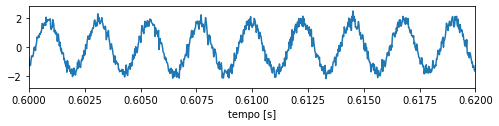

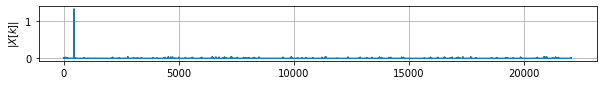

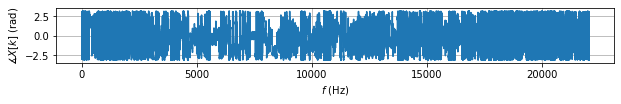

In [84]:
plt.figure(figsize=(8,1.5))
plt.plot(tempo, diapasao)
plt.xlabel("tempo [s]")
plt.xlim((0,max(tempo)))
plt.xlim((.6,.62));

### SEU CÓDIGO COMEÇA AQUI ### (função que plota a FFT do sinal)

mag, pha, f = fourier(diapasao, tempo, Hz=True, dB=False, deg=False, Nfft=None)
plt.figure(figsize=(10,1)) #coloca figura para plotagem do grafico
plt.plot(f, mag) #plota magnitude em função da frequência
plt.ylabel("$|X[k]|$") #label do eixo y
plt.grid(1); #grid 
plt.figure(figsize=(10,1)) #coloca figura para plotagem do grafico
plt.ylabel("$\measuredangle X[k]$ (rad)") #label eixo y
plt.xlabel("$f$ (Hz)") #label eixo x pros dois
plt.plot(f, pha) #plota fase pela frequencia
plt.grid(1);

### FIM DO CÓDIGO ###

ipd.Audio(diapasao, rate=fs, normalize=True)

### Flauta

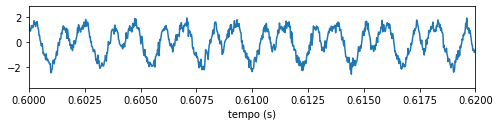

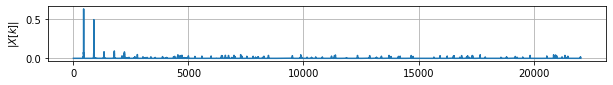

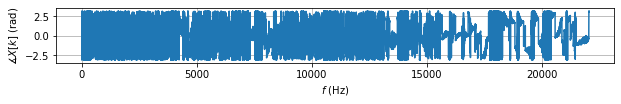

In [85]:
plt.figure(figsize=(8,1.5))
plt.plot(tempo, flauta)
plt.xlabel("tempo (s)")
plt.xlim((0,max(tempo)))
plt.xlim((.6,.62))

### SEU CÓDIGO COMEÇA AQUI ### (função que plota a FFT do sinal)
mag, pha, f = fourier(flauta, tempo, Hz=True, dB=False, deg=False, Nfft=None)
plt.figure(figsize=(10,1)) #coloca figura para plotagem do grafico
plt.plot(f, mag) #plota magnitude em função da frequência
plt.ylabel("$|X[k]|$") #label do eixo y
plt.grid(1); #grid 
plt.figure(figsize=(10,1)) #coloca figura para plotagem do grafico
plt.ylabel("$\measuredangle X[k]$ (rad)") #label eixo y
plt.xlabel("$f$ (Hz)") #label eixo x pros dois
plt.plot(f, pha) #plota fase pela frequencia
plt.grid(1);
### FIM DO CÓDIGO ###

ipd.Audio(flauta, rate=fs, normalize=True)

### Violoncelo

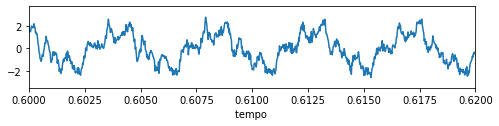

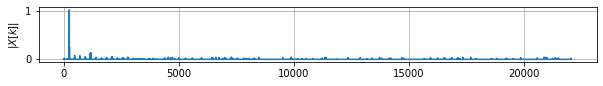

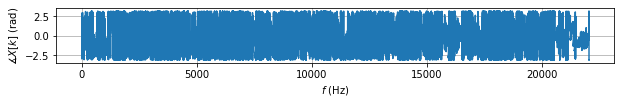

In [86]:
plt.figure(figsize=(8,1.5))
plt.plot(tempo, cello)
plt.xlabel("tempo ")
plt.xlim((0,max(tempo)))
plt.xlim((.6,.62))

### SEU CÓDIGO COMEÇA AQUI ### (função que plota a FFT do sinal)
mag, pha, f = fourier(cello, tempo, Hz=True, dB=False, deg=False, Nfft=None)
plt.figure(figsize=(10,1)) #coloca figura para plotagem do grafico
plt.plot(f, mag) #plota magnitude em função da frequência
plt.ylabel("$|X[k]|$") #label do eixo y
plt.grid(1); #grid 
plt.figure(figsize=(10,1)) #coloca figura para plotagem do grafico
plt.ylabel("$\measuredangle X[k]$ (rad)") #label eixo y
plt.xlabel("$f$ (Hz)") #label eixo x pros dois
plt.plot(f, pha) #plota fase pela frequencia
plt.grid(1);
### FIM DO CÓDIGO ###

ipd.Audio(cello, rate=fs, normalize=True)

**Saída esperada**:
1. Em cada trecho de código, espera-se o player do audio, o sinal no domínio do tempo e o sinal do domínio da frequência.
---

## Projeto de filtro FIR

Os sinais de áudio estão contaminados com ruído. Sabe-se que os conteúdos espectrais acima de 2,5 kHz podem ser filtrados, pois tratam-se de ruídos.

<mark> **Faça**</mark>: Projete um **filtro FIR** para eliminar ruídos e use o filtro nos sinais.

**ATENÇÃO**: se você chegou até aqui na disciplina, provavelmente já compreendeu os principais passos para *projeto de um filtro* e seu uso. Neste exercício, você tem autonomia para decidir o filtro mais adequado, seus parâmetros de projeto e as melhores formas de apresentar suas características. Não será dada nenhuma instrução específica de como apresentar os resultados, quais gráficos são importantes de serem analisados e nem como apresentar os sinais. Apresente da melhor forma possível, este item fará parte da avaliação.

In [87]:
### SEU CÓDIGO COMEÇA AQUI ### 

Gp = -1
Gr = -50
dp = 1 - (10**(Gp/20))
dr = 10**(Gr/20)
Ap = -Gp
Ar = -Gr
wp = 2400*np.pi*2
wr = 2800*np.pi*2
ws = 20000*np.pi*2
delta = min(dp, dr)
delta_db = 20*np.log10(delta)

### FIM DO CÓDIGO ###

In [88]:
### SEU CÓDIGO COMEÇA AQUI ### 

from scipy.signal import kaiserord, firwin, freqz

numtaps, beta = signal.kaiserord(delta_db,((400*np.pi*2)/(20000*2*(np.pi/2))))# M = ordem do filtro e beta = paramentro beta

### FIM DO CÓDIGO ###

In [89]:
### SEU CÓDIGO COMEÇA AQUI ### 

h = signal.firwin(numtaps = numtaps, cutoff = (2500*np.pi*2), width=(400*np.pi*2), window=('kaiser',beta), pass_zero='lowpass', scale=True, nyq=None, fs=ws)

### FIM DO CÓDIGO ###

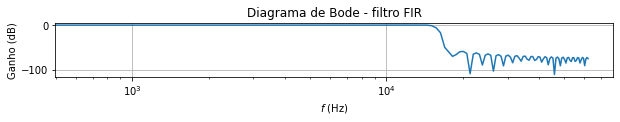

In [90]:
### SEU CÓDIGO COMEÇA AQUI ### 

fir = signal.dlti(h, 1, dt = 1/ws);
w1, mag1, pha1 = signal.dbode(fir);

plt.figure(figsize=(10,1));
plt.semilogx((w1/(2*np.pi)), mag1);
plt.title("Diagrama de Bode - filtro FIR");
plt.xlabel("$f$ (Hz)") ;
plt.ylabel("Ganho (dB)");
plt.grid(1);

### FIM DO CÓDIGO ###

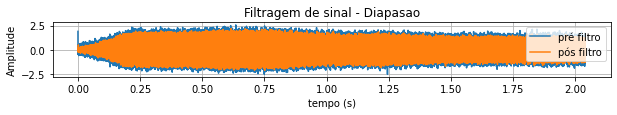

In [91]:
### SEU CÓDIGO COMEÇA AQUI ### 
diapasao_fir = signal.lfilter(h, 1, diapasao)
flauta_fir = signal.lfilter(h, 1, flauta)
cello_fir = signal.lfilter(h, 1, cello)

plt.figure(figsize=(10,1))
plt.plot(tempo, diapasao)
plt.plot(tempo, diapasao_fir)
plt.legend(['pré filtro','pós filtro'])
plt.title("Filtragem de sinal - Diapasao")
plt.xlabel("tempo (s)") #Label x
plt.ylabel("Amplitude"); #Label y
plt.grid(1);

ipd.Audio(diapasao_fir, rate=fs, normalize=True)


### FIM DO CÓDIGO ###

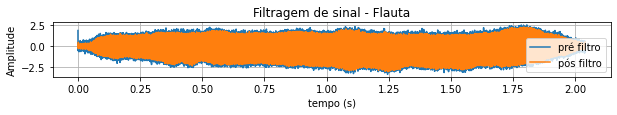

In [92]:
plt.figure(figsize=(10,1))
plt.plot(tempo, flauta)
plt.plot(tempo, flauta_fir)
plt.legend(['pré filtro','pós filtro'])
plt.title("Filtragem de sinal - Flauta")
plt.xlabel("tempo (s)") #Label x
plt.ylabel("Amplitude"); #Label y
plt.grid(1);

ipd.Audio(flauta_fir, rate=fs, normalize=True)

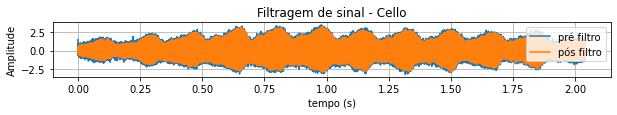

In [93]:
plt.figure(figsize=(10,1))
plt.plot(tempo, cello)
plt.plot(tempo, cello_fir)
plt.legend(['pré filtro','pós filtro'])
plt.title("Filtragem de sinal - Cello")
plt.xlabel("tempo (s)") #Label x
plt.ylabel("Amplitude"); #Label y
plt.grid(1);

ipd.Audio(cello_fir, rate=fs, normalize=True)

___
## Projeto de filtro IIR

Agora, projete um filtro IIR, usando a função `signal.iirdesign`, para realizar a mesma tarefa anterior: filtrar ruídos.

<mark> **Faça**</mark>: Projete um **filtro IIR** usando a função `signal.iirdesign` para eliminar ruídos e use o filtro nos sinais.

In [94]:
### SEU CÓDIGO COMEÇA AQUI ### 
None
### FIM DO CÓDIGO ###

In [95]:
### SEU CÓDIGO COMEÇA AQUI ### 
None
### FIM DO CÓDIGO ###

In [96]:
### SEU CÓDIGO COMEÇA AQUI ### 
None
### FIM DO CÓDIGO ###

In [97]:
### SEU CÓDIGO COMEÇA AQUI ### 
None
### FIM DO CÓDIGO ###

In [98]:
### SEU CÓDIGO COMEÇA AQUI ### 
None
### FIM DO CÓDIGO ###

___
## Sinais produzidos pelo filtro FIR vs IIR

<mark> **Faça**</mark>: Usando a função `signal.lfilter`, filtre e compare os sinais produzidos pelo filtro FIR e pelo filtro IIR.

***Como devo comparar?*** A decisão de como comparar os sinais também faz parte da avaliação. Lembre-se das principais diferenças construtivas entre filtros FIR e filtros IIR para determinar qual a melhor forma (gráfica) para ressaltar a diferença entre os sinais produzidos.

In [99]:
### SEU CÓDIGO COMEÇA AQUI ### 
None
### FIM DO CÓDIGO ###

In [100]:
### SEU CÓDIGO COMEÇA AQUI ### 
None
### FIM DO CÓDIGO ###

___

# Concluões

**1 - Quais as principais diferenças entre o atraso de grupo dos filtros FIR e IIR? Justifique mencionando explicitamente um gráfico produzido.**

**Resposta:**

`[escreva aqui sua resposta]`

**2 - Qual filtro teve maior ordem, FIR ou IIR?**

**Resposta:**

`[escreva aqui sua resposta]`

______________

# Desafio (opcional)

1. Compare a distorção na forma de onda provocada pelo filtro IIR em comparação com o filtro FIR.
1. Compare a aplicação da função "lfilter" com a função "filtfilt" e explique a diferença entre elas.
1. Faça projeto de um filtro Bessel e mostre suas principais características em comparação com os demais.
1. Compare a FFT de um sinal com a FFT do sinal "janelado", usando diferentes janelas. Quais efeitos observados?

<p><a href="https://colab.research.google.com/github/ifmg-betim/2022.2_AUT.040_ProcSin/blob/main/Ex/Ex08_FiltrosDigitais_SEU_NOME.ipynb"><img align="left" src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open in Colab" title="Open in Google Colaboratory"></a>